# Outlet Gage Selection

In [2]:
# IMPORTS
import os

os.chdir('C:\\Users\\kondr\\Documents\\GitHub\\HighMagFlows_EPA_Project')

import pandas as pd 
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import contextily as cx
import requests
import calendar
from importlib import reload
import mapclassify as mc
from dataretrieval import nwis

from datetime import datetime, timedelta
from shapely.geometry import Point
from io import StringIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch

# Custom modules are imported in multiple locations to faciliate easy reloading when edits are made to their respective files
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

<module 'Src.func_ko' from 'C:\\Users\\kondr\\Documents\\GitHub\\HighMagFlows_EPA_Project\\Src\\func_ko.py'>

## Import gages (valid only with site names)

In [7]:
# Dataset upload
data_paths = {
    '30_90': 'Prelim_Data/National_Metrics/Station_names/National_Metrics_30_90.xlsx',
    '50_90': 'Prelim_Data/National_Metrics/Station_names/National_Metrics_50_90.xlsx',
    '30_95': 'Prelim_Data/National_Metrics/Station_names/National_Metrics_30_95.xlsx',
    '50_95': 'Prelim_Data/National_Metrics/Station_names/National_Metrics_50_95.xlsx'    
}

#dfs_metrics = {key: pd.read_excel(path, sheet_name='site_metrics') for key, path in data_paths.items()}
dfs_valid = {key: pd.read_excel(path) for key, path in data_paths.items()}

In [8]:
# Number of valid gages
for date_range in date_ranges:
    for percentile in percentiles: 
        df_length = dfs_valid[f'{date_range}_{percentile}']
        print(f'{date_range}-Year gages (valid = True): {len(df_length)}')

30-Year gages (valid = True): 4242
30-Year gages (valid = True): 4242
50-Year gages (valid = True): 3314
50-Year gages (valid = True): 3314


## Import gages (valid and invalid)

In [4]:
# Dataset upload
data_paths = {
    '30_90': 'Prelim_Data/National_Metrics/National_Metrics_30_90.xlsx',
    '50_90': 'Prelim_Data/National_Metrics/National_Metrics_50_90.xlsx',
    '30_95': 'Prelim_Data/National_Metrics/National_Metrics_30_95.xlsx',
    '50_95': 'Prelim_Data/National_Metrics/National_Metrics_50_95.xlsx'    
}

#dfs_metrics = {key: pd.read_excel(path, sheet_name='site_metrics') for key, path in data_paths.items()}
dfs_metrics = {key: pd.read_excel(path) for key, path in data_paths.items()}

In [5]:
# Print length of dfs_metrics
date_ranges = ['30', '50']
percentiles = ['90', '95']
for date_range in date_ranges:
    for percentile in percentiles: 
        print(len(dfs_metrics[f'{date_range}_{percentile}']))

4242
4242
3314
3314


In [8]:
for date_range in date_ranges:
    for percentile in percentiles: 
        # Assuming df is your DataFrame and 'column_name' is the name of the column with numbers
        dfs_metrics[f'{date_range}_{percentile}']['site_no'] = dfs_metrics[f'{date_range}_{percentile}']['site_no'].astype(str)  # Convert numbers to strings

        # Add leading '0' to numbers with 7 digits
        dfs_metrics[f'{date_range}_{percentile}']['site_no'] = dfs_metrics[f'{date_range}_{percentile}']['site_no'].apply(lambda x: '0' + x if len(x) == 7 else x)

In [9]:
# Valid gages
date_ranges = ['30', '50']
percentiles = ['90', '95']
dfs_valid = {}
for date_range in date_ranges:
    for percentile in percentiles: 
        dfs_valid[f'{date_range}_{percentile}'] = dfs_metrics[f'{date_range}_{percentile}'][dfs_metrics[f'{date_range}_{percentile}']['valid'] == True]
        
dfs_invalid = {}
for date_range in date_ranges:
    for percentile in percentiles: 
        dfs_invalid[f'{date_range}_{percentile}'] = dfs_metrics[f'{date_range}_{percentile}'][dfs_metrics[f'{date_range}_{percentile}']['valid'] == False]

In [1]:
# Number of valid gages
for date_range in date_ranges:
    for percentile in percentiles: 
        df_length = dfs_valid[f'{date_range}_{percentile}']
        print(f'{date_range}-Year gages (valid = True): {len(df_length)}')

NameError: name 'date_ranges' is not defined

### Add station names to df

In [21]:
# Add names to 50-year dfs_valid
gage_names_50 = []
for site in dfs_valid[f'50_90']['site_no'].unique():
    temp_df = nwis.get_record(sites=site, service='site')
    gage_name = temp_df['station_nm'][0]
    #print(gage_name)
    gage_names_50.append(gage_name)
    #print(gage_names_50)

In [32]:
# Add names to 30-year dfs_valid
gage_names_30 = []
for site in dfs_valid[f'30_90']['site_no'].unique():
    #print(site)
    try:
        temp_df = nwis.get_record(sites=site, service='site')
        gage_name = temp_df['station_nm'][0]
    except Exception as e:
        gage_name = 'station_name_error'
    #print(site, gage_name)
    gage_names_30.append(gage_name)

In [36]:
# Assign gage names as column and save to Excel
dfs_valid['30_90']['station_nm'] = gage_names_30
dfs_valid['30_90'].to_excel(f'Prelim_Data/National_Metrics/Station_names/National_Metrics_30_90.xlsx')

dfs_valid['30_95']['station_nm'] = gage_names_30
dfs_valid['30_95'].to_excel(f'Prelim_Data/National_Metrics/Station_names/National_Metrics_30_95.xlsx')

dfs_valid['50_90']['station_nm'] = gage_names_50
dfs_valid['50_90'].to_excel(f'Prelim_Data/National_Metrics/Station_names/National_Metrics_50_90.xlsx')

dfs_valid['50_95']['station_nm'] = gage_names_50
dfs_valid['50_90'].to_excel(f'Prelim_Data/National_Metrics/Station_names/National_Metrics_50_95.xlsx')

C:\Users\kondr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kondr\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kondr\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

## Plot valid gages on map

### Import aquifers, lower48, and HUC2s

In [9]:
# Aquifers to plot and dataset to use
lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
aq_shape = gpd.read_file('ShapeFiles/Aquifers/_Master_Aquifer/master_aquifer.shp')
aq_usgs = gpd.read_file('ShapeFiles/Aquifers_USGS/us_aquifers.shp')
stream_network = gpd.read_file('ShapeFiles/Streams_US/us_streams.shp')
aq_usgs_selected_10 = gpd.read_file('ShapeFiles/Aquifers_USGS_10/Aquifers_USGS_10.shp')
aq_usgs_selected_25 = gpd.read_file('ShapeFiles/Aquifers_USGS_25/Aquifers_USGS_25.shp')
huc2 = gpd.read_file('ShapeFiles/_Master_HUC2/master_huc2.shx')

In [15]:
#dfs_valid['30_90']

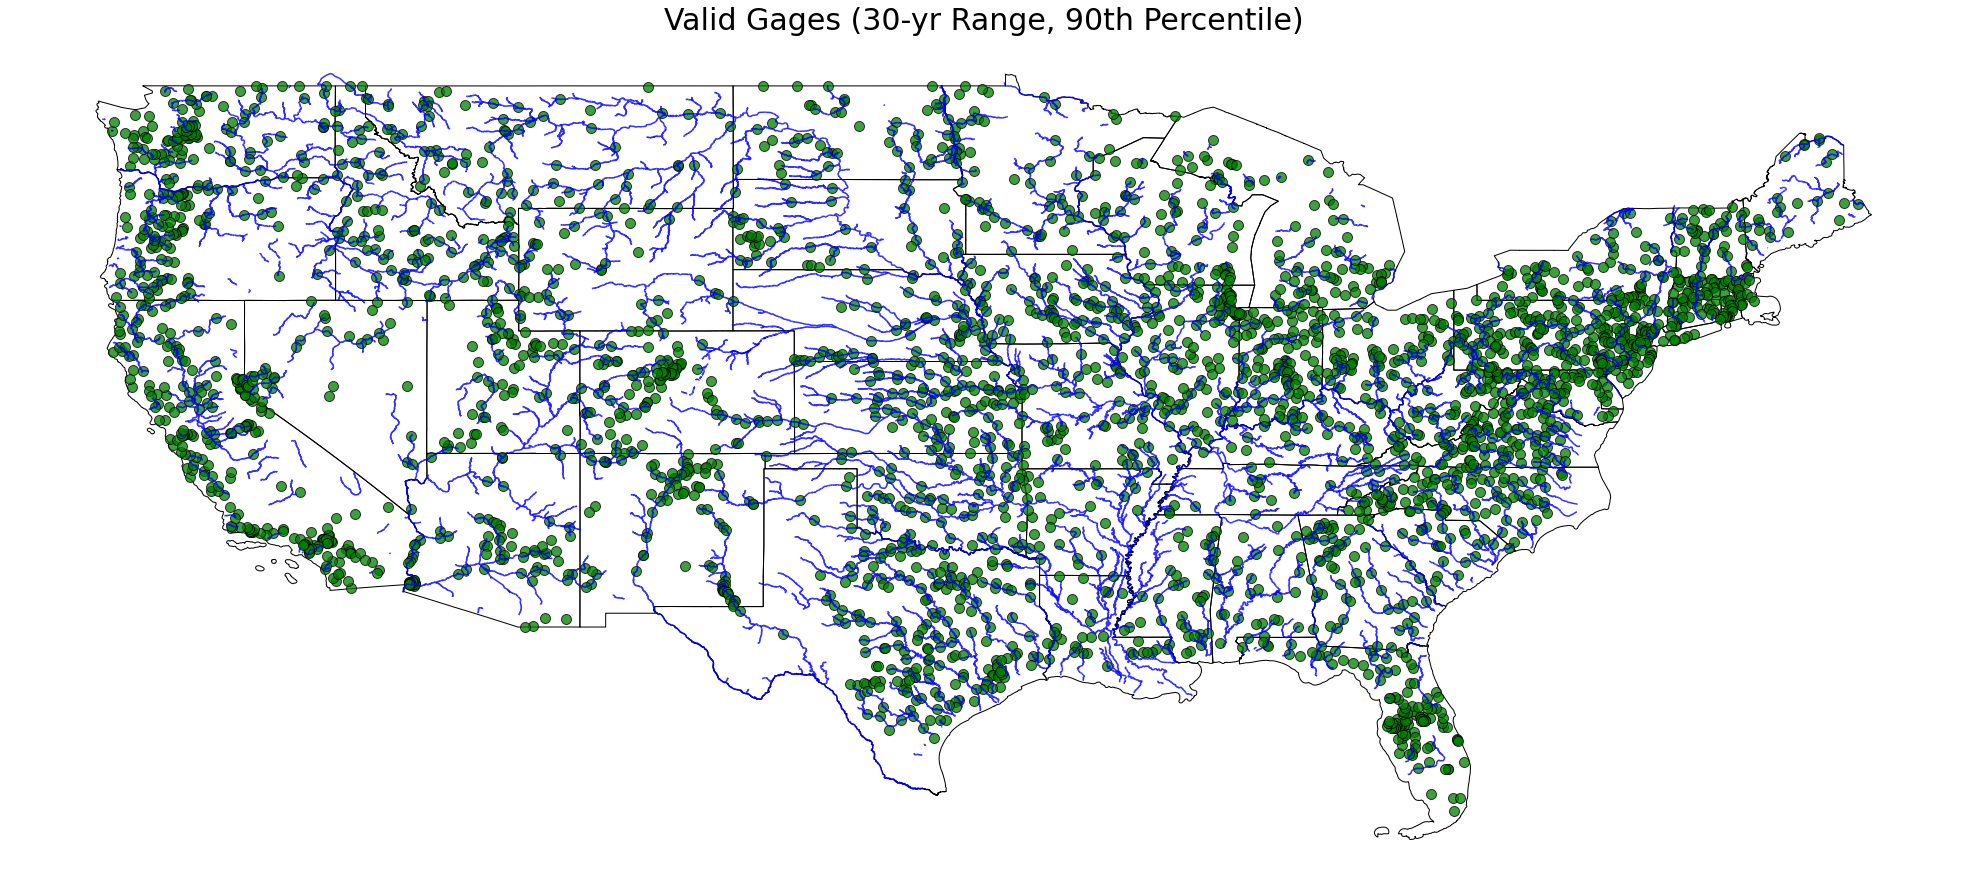

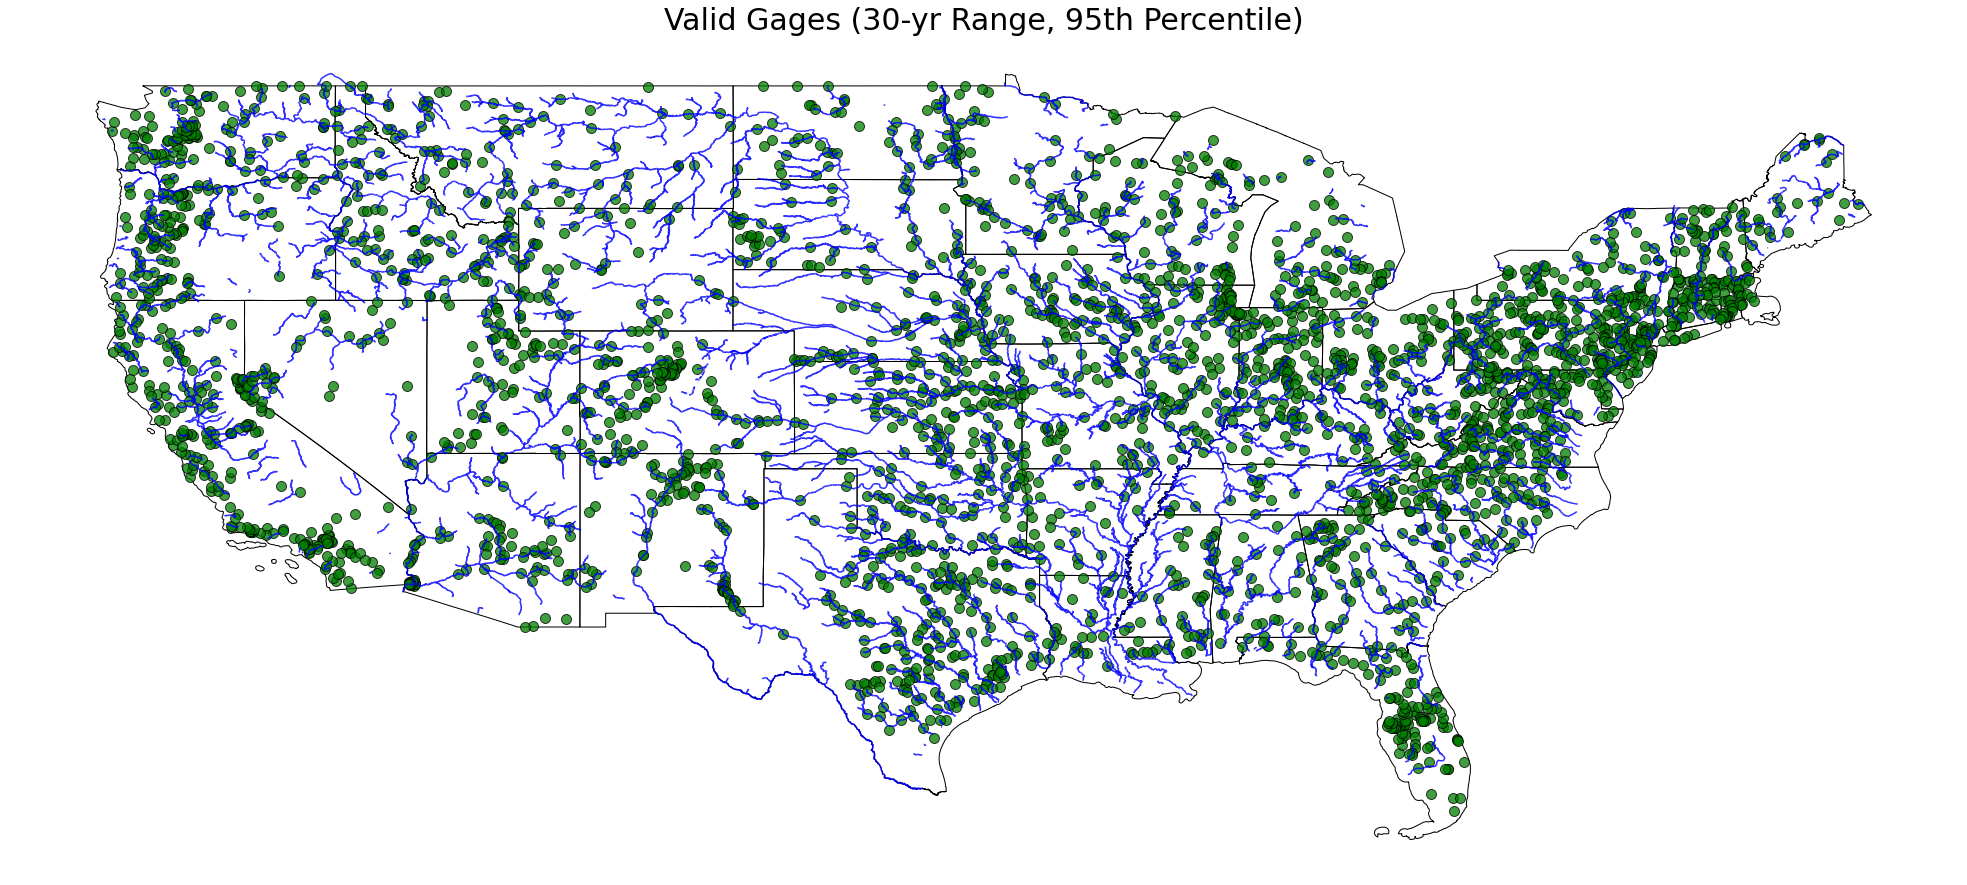

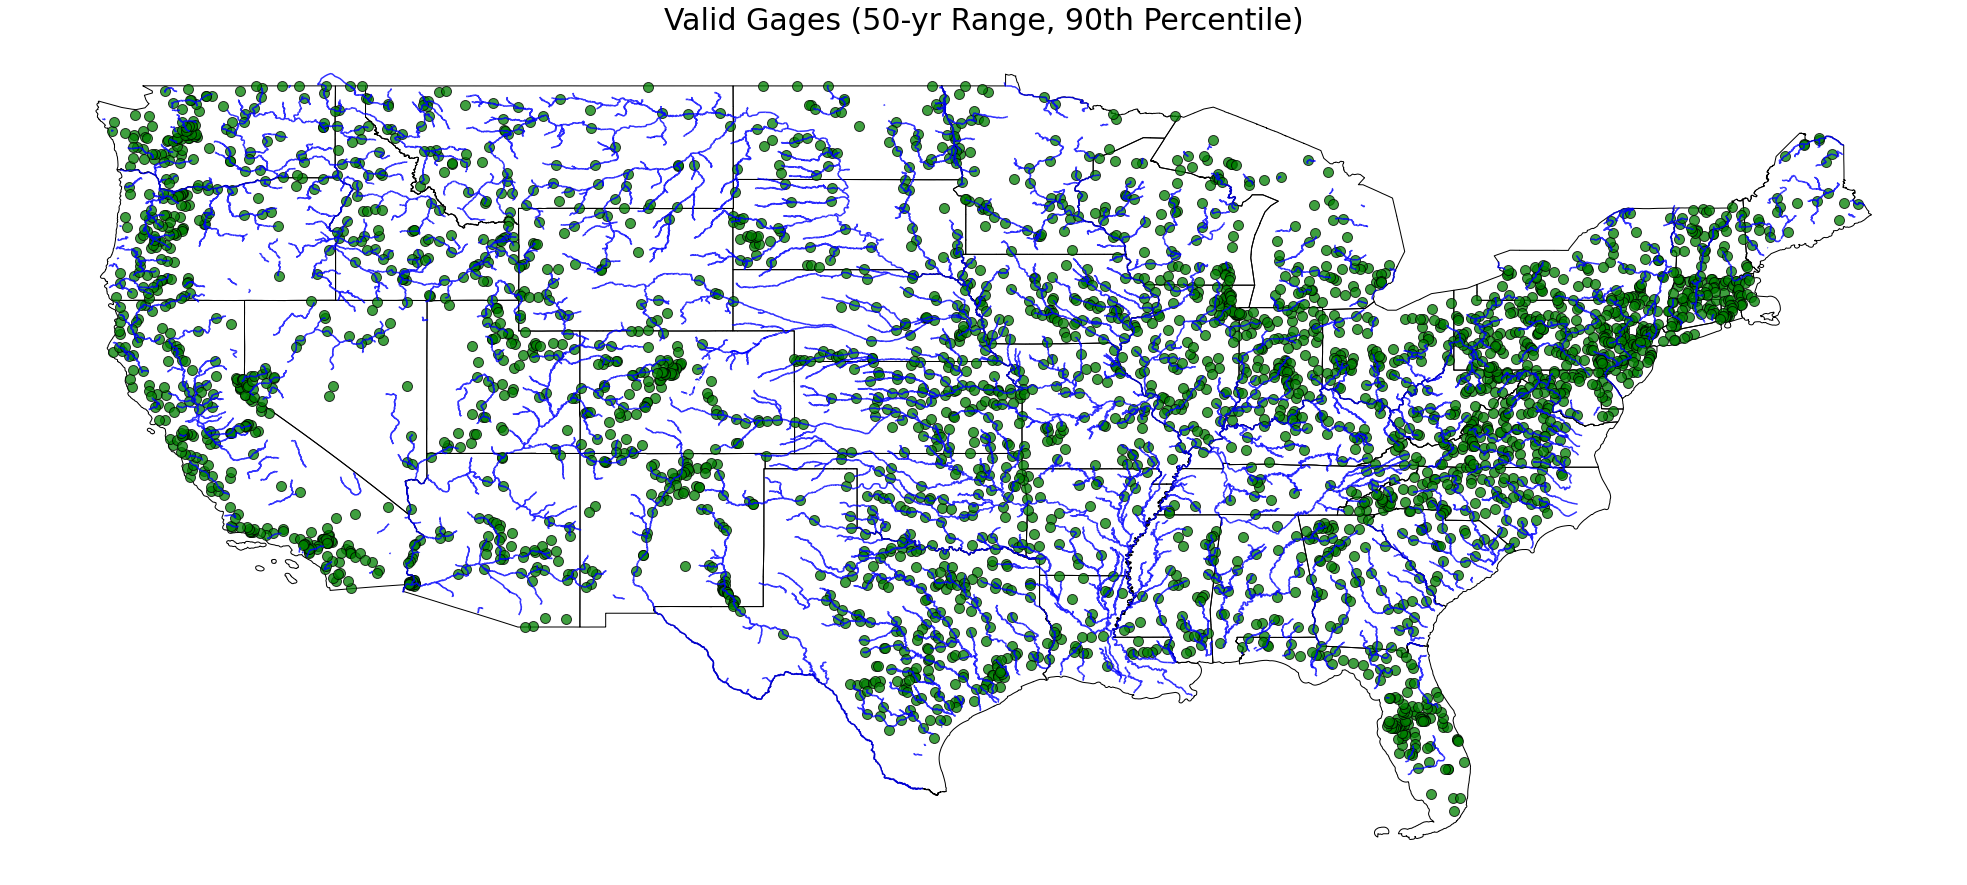

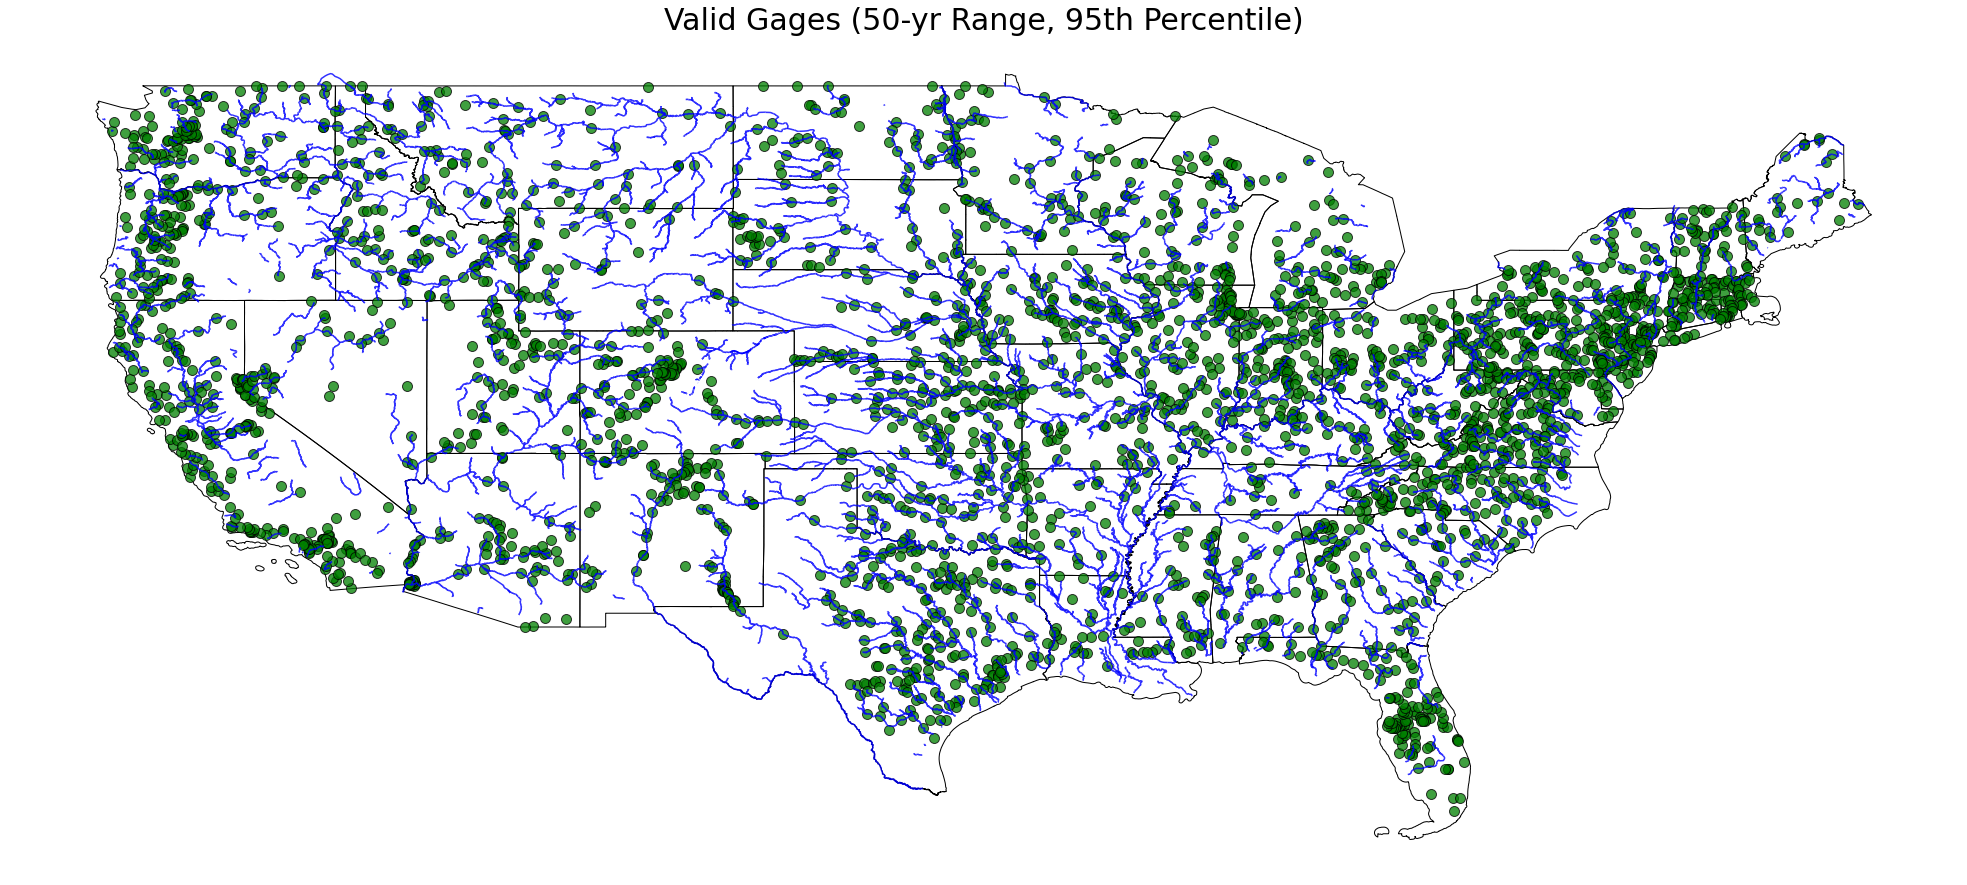

In [17]:
# Plot gages
def plot_valid_gages(date, percentile):
    df = dfs_valid[f'{date_range}_{percentile}']
    fig, ax = plt.subplots(figsize=(35, 35))
    
    plt.title(f'Valid Gages ({date}-yr Range, {percentile}th Percentile)', fontsize=30)

    lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
    lower48 = lower48.to_crs(epsg=4269)
    #lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 
    
    stream_network.plot(ax=ax, color='blue', linewidth=1.5, alpha=0.8, zorder=2) 

    lat = df['dec_lat_va'].tolist()
    long = df['dec_long_va'].tolist()
    geometry = [Point(xy) for xy in zip(long, lat)]
    geo_pts = gpd.GeoDataFrame(geometry=geometry)

    bx = geo_pts.plot(ax=ax, color='green', marker='o', markersize=100, 
                         edgecolor='black', linewidth=1, alpha=0.75, legend=True) 

    plt.axis("off")

    plt.show()
    return
  
#df_valid_list = [df_30_90, df_50_90, df_30_95, df_50_95]
for date in date_ranges:
    for percentile in percentiles:
        plot_valid_gages(date, percentile)

### Plotly map of all gages

In [19]:
import plotly.express as px

df_1 = dfs_valid['30_90']

# The metric to color the datapoints by
color_metric = "inter_annual%"
# The metric to size the datapoints by
size_metric = "annual_hmf"

df_1 = df_1.sort_values(by=size_metric, ascending=True)

fig = px.scatter_mapbox(df_1, lat="dec_lat_va", lon="dec_long_va", hover_name='site_no', hover_data=["site_no", "station_nm","annual_hmf"], color=size_metric,
                       zoom=3, height=700, width=1200, color_continuous_scale=px.colors.sequential.Rainbow, opacity=0.75)

# fig.add_trace(px.choropleth_mapbox(aq_usgs_selected_10, 
#                                     geojson=aq_usgs_selected_10.geometry, 
#                                     #locations=aq_usgs_selected_10.index, 
#                                     color='Shape_Area', 
#                                     hover_name='AQ_NAME').data[0])

# aq_usgs_selected_10 = aq_usgs_selected_25.to_crs(epsg=4269)
# fig = px.choropleth_mapbox(aq_usgs_selected_10, 
#                             geojson=aq_usgs_selected_10.geometry, 
#                             color='Shape_Area',
#                             #locations=aq_usgs_selected_10.index,
#                             hover_name='AQ_NAME')
              
# fig = px.choropleth(aq_usgs_selected_10,
#                    geojson=aq_usgs_selected_10.geometry,
#                    locations=aq_usgs_selected_10.index,
#                    color="Shape_Area")
#                    #projection="mercator")

# aq_usgs_selected_10 = aq_usgs_selected_25.to_crs(epsg=4269)
# aq_shape_1 = aq_usgs_selected_10[aq_usgs_selected_10['AQ_NAME'] == aquifer_name]
# aq_shape_1.plot(ax=ax, facecolor='darkgrey', edgecolor='red', linewidth=2.0, alpha=0.8)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

ValueError: Value of 'hover_data_1' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'site_no', 'analyze_start', 'analyze_end', 'analyze_range', 'quantile', 'valid', 'missing_data%', 'threshold', 'hmf_years', 'annual_hmf', 'six_mo_hmf', 'three_mo_hmf', 'annual_duration', 'event_duration', 'event_hmf', 'inter_annual%', 'intra_annual', 'timing', 'jan_hmf', 'feb_hmf', 'mar_hmf', 'apr_hmf', 'may_hmf', 'jun_hmf', 'jul_hmf', 'aug_hmf', 'sep_hmf', 'oct_hmf', 'nov_hmf', 'dec_hmf', 'dec_lat_va', 'dec_long_va', 'data_start', 'data_end', 'total_record', 'state', 'huc2_code', 'huc4_code', 'within_aq', 'HCDN_2009', 'station_nm'] but received: station_nmannual_hmf

## Gages for individual aquifers

In [2]:
aq_list_10 = ['High Plains aquifer',
                'Mississippi River Valley alluvial aquifer',
                'Central Valley aquifer system',
                'Basin and Range basin-fill aquifers',
                'Floridan aquifer system',
                'Snake River Plain basaltic-rock aquifers',
                'Coastal lowlands aquifer system',
                'California Coastal Basin aquifers', 
                'Pacific Northwest basin-fill aquifers',
                'Northern Atlantic Coastal Plain aquifer system']

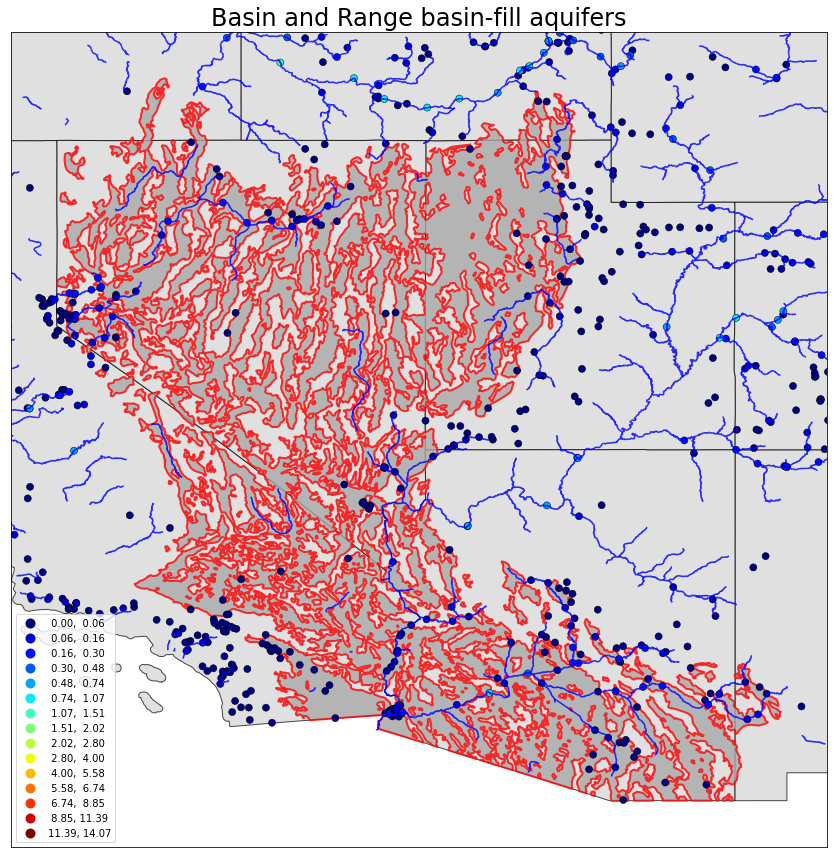

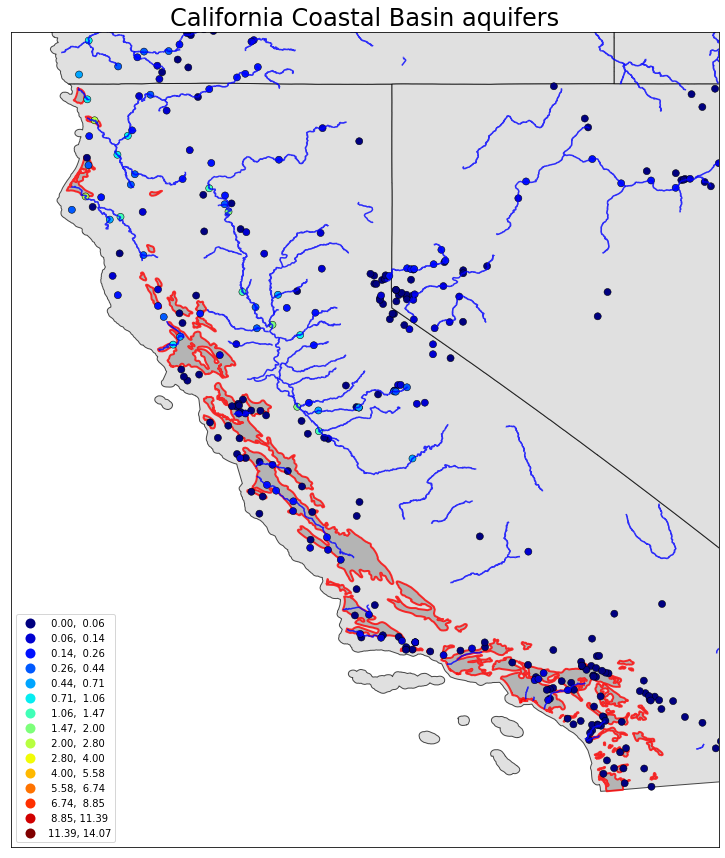

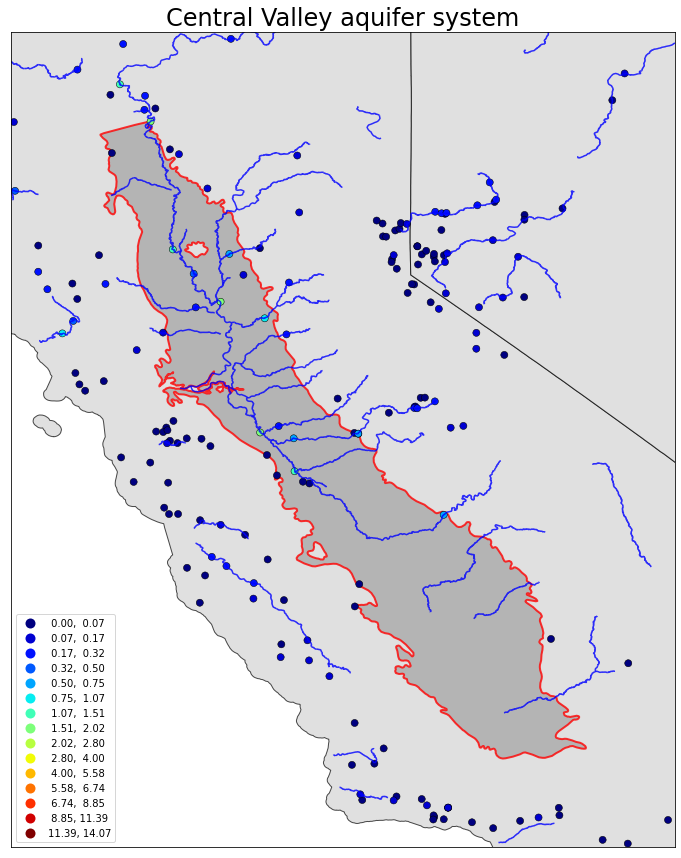

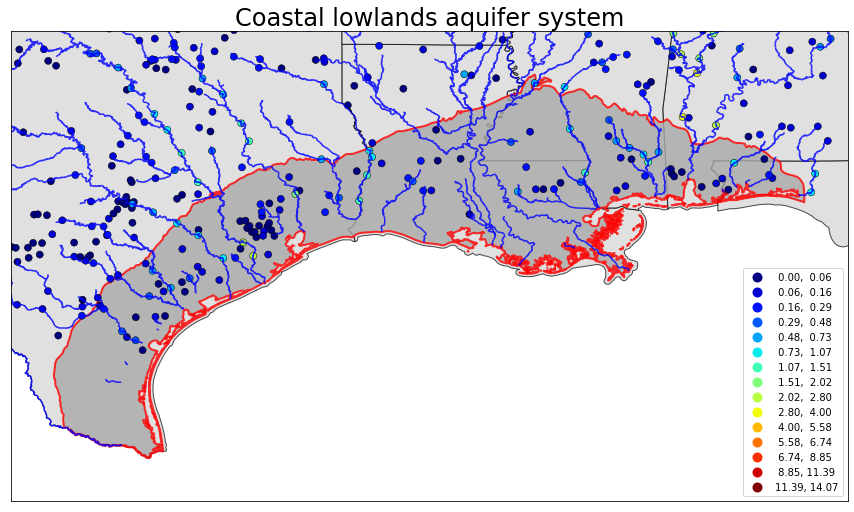

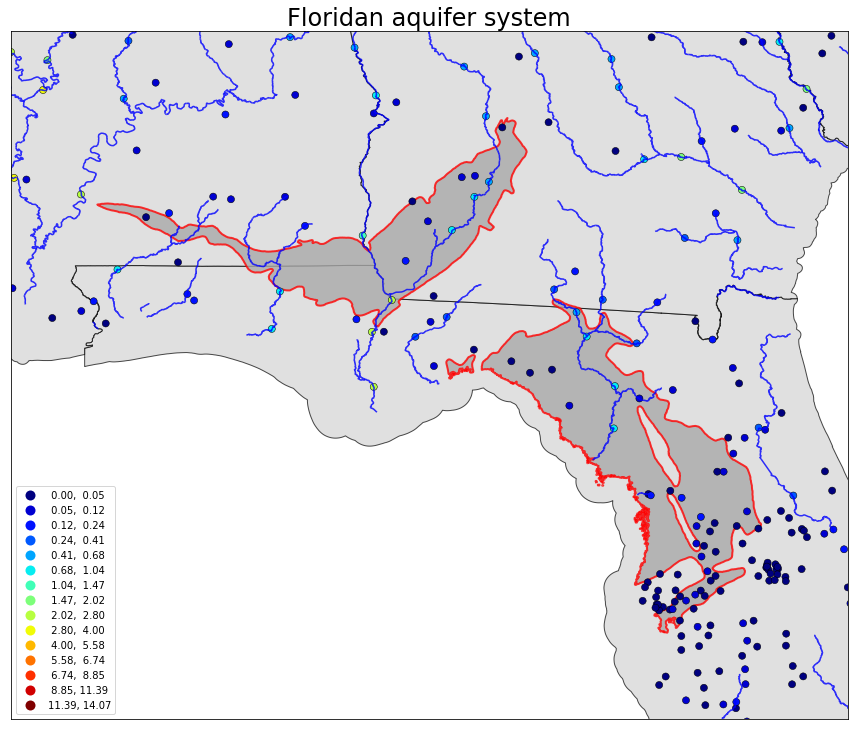

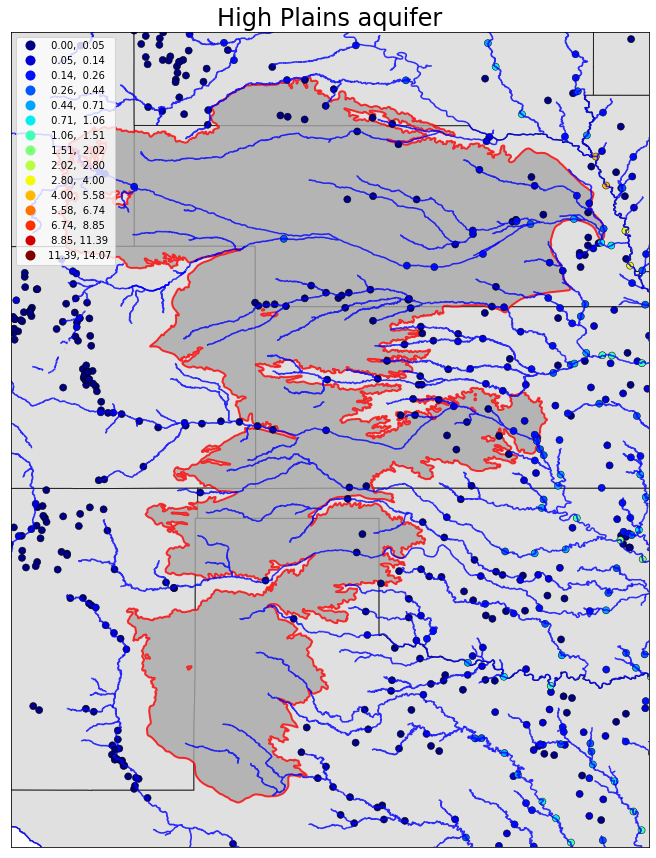

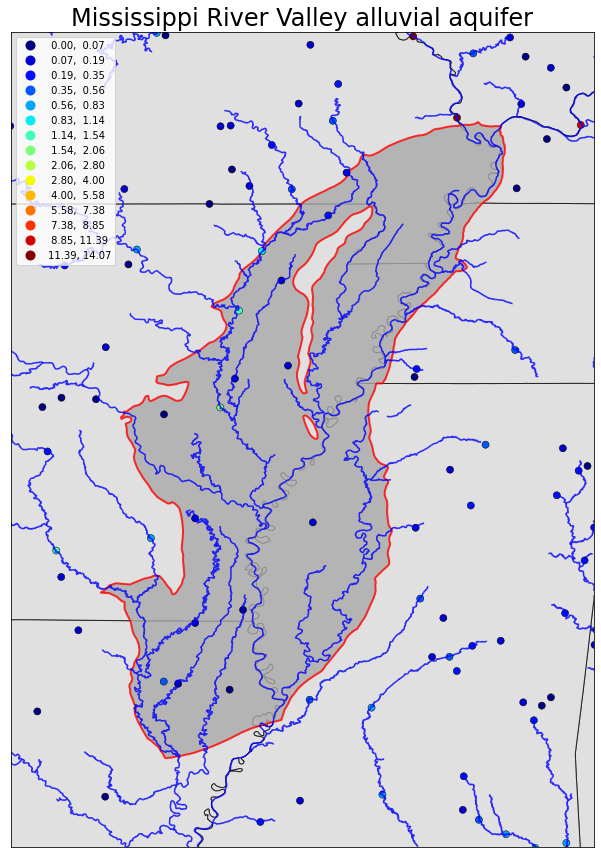

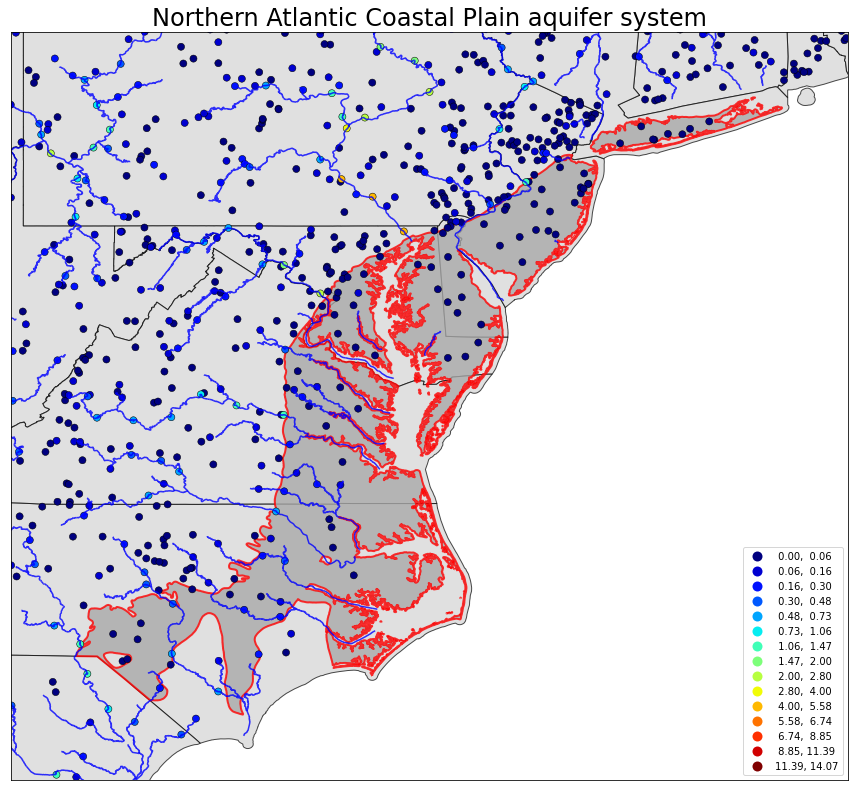

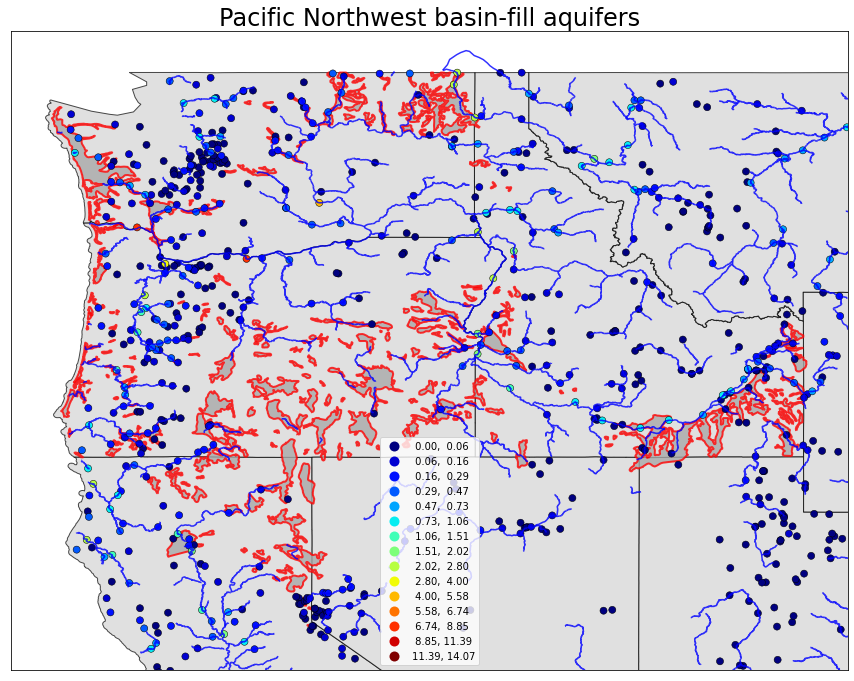

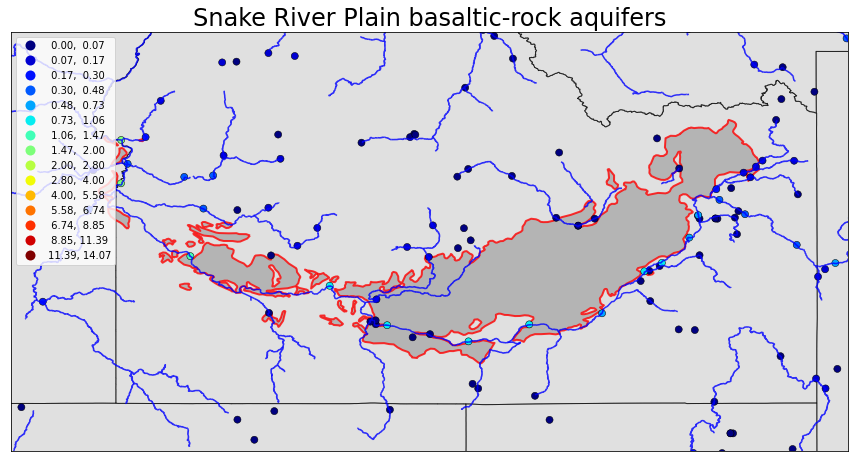

In [26]:
def plot_single_aquifer(aquifer_name, lower48, df):
    fig, ax = plt.subplots(figsize=(15, 15))
    #plt.title(f"Multi-Aquifer {metric} Plot for {range} Years & {quantile}th Quantile", loc='center', fontsize=24)
    plt.title(f'{aquifer_name}', fontsize=24)

    # Lower-48 Plot
    lower48 = lower48.to_crs(epsg=4269)
    #lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='lightgrey', linewidth=1.0, alpha=0.7) 

    #stream_network = stream_network.to_crs(epsg=4269)
    stream_network.plot(ax=ax, color='blue', linewidth=1.5, alpha=0.8, zorder=2) 

    aq_usgs_selected_10 = aq_usgs_selected_25.to_crs(epsg=4269)
    aq_shape_1 = aq_usgs_selected_10[aq_usgs_selected_10['AQ_NAME'] == aquifer_name]
    aq_shape_1.plot(ax=ax, facecolor='darkgrey', edgecolor='red', linewidth=2.0, alpha=0.8)
    
    lat = df['dec_lat_va'].tolist()
    long = df['dec_long_va'].tolist()
    geometry = [Point(xy) for xy in zip(long, lat)]
    geo_pts = gpd.GeoDataFrame(geometry=geometry)
    df = df.reset_index()
    geo_df = geo_pts.merge(df, how='left', left_index=True, right_index=True)

    classifier = mc.NaturalBreaks(geo_df['annual_hmf'], k=15)
    geo_df = geo_df.sort_values('annual_hmf', ascending=True)

    #bx = geo_df.plot(ax=ax, color='green', marker='o', markersize=50, 
    #                     edgecolor='black', linewidth=1, alpha=0.75, legend=True) 

    cmap='jet' #'rainbow_r'
    geo_df.plot(ax=ax, column='annual_hmf', scheme='user_defined', classification_kwds={'bins': classifier.bins}, 
                cmap=cmap, legend=True, #legend_kwds=legend_frmt, 
                alpha=1.0, marker='o', 
                markersize=50,
                edgecolor='black', linewidth=0.5)

    #xmin, xmax, ymin, ymax = fn.set_plot_bounds(aq_shape_1, padding=30.0)

    xmin, ymin, xmax, ymax = aq_shape_1.total_bounds
    padding = 0.75
    xmin -= padding
    ymin -= padding
    xmax += padding
    ymax += padding

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_yticks([])
    ax.set_xticks([])
    
    img_path = f'Saved_Visuals/Aquifers/{aquifer_name}_gages.png'
    fn.save_plot_as_image(img_path, overwrite) 

    plt.show()
    
for aquifer_name in aq_list_10:
    plot_single_aquifer(aquifer_name, lower48, dfs_valid['30_90'])
#plot_single_aquifer(aquifer_name, lower48)

In [45]:
# Outlet gages by aquifer
br_outlet_gages = ['09520500', '09429600', '09521100', '09519800', '09468500', '09423000', '10327500', '10351650', '10351650', '10311400']
cc_outlet_gages = ['11023000', '11046000', '11078000', '11087020', '11133000', '11140000', '11152500', '11159000', '11467000', '11477000', '11530500', '11532500']
cv_outlet_gages = ['11303500', '11447650']
cl_outlet_gages = ['08211000', '08188500', '08176500', '08164000', '08162000', '08116650', '08066500', '08033500', '08068000', '08030500',
      '08013500', '08012000', '07378500', '02492000', '02489500', '02479000', '02479300', '02469761', '02428400', '02375500']
fl_outlet_gages = ['02368000', '02365500', '02358000', '02320500', '02313230']
hp_outlet_gages = ['08123800', '08121000', '07297910', '07228000', '07234000', '07157500', '07144550', '06853500', '06805500', '06799500', '06465500']
mr_outlet_gages = ['07077000', '07077555', '07047942', '07369000', '07369000', '07285500', '07268000']
na_outlet_gages = ['02105769', '02089500', '02091500', '02083500',  '02085000', '02052000', '02047000', '02049500',  '02041650', '02037500', '01668000', 
      '01673000',  '01646500', '01578310', '01474500',  '01463500']
pn_outlet_gages = ['11039800', '12200500', '12040500', '14211720',  '14372300']
sr_outlet_gages = ['13269000']

outlet_gages_dict = {
    'br': br_outlet_gages, 
    'cc': cc_outlet_gages,
    'cv': cv_outlet_gages,
    'cl': cl_outlet_gages,
    'fl': fl_outlet_gages,
    'hp': hp_outlet_gages,
    'mr': mr_outlet_gages,
    'na': na_outlet_gages,
    'pn': pn_outlet_gages,
    'sr': sr_outlet_gages
}

In [120]:
df_outlet_gages = {}
for key, value in outlet_gages_dict.items():
    df_outlet_gages[key] = df_30_90[df_30_90['site_no'].isin(value)]

In [121]:
df_outlet_gages

{'br':        site_no analyze_start analyze_end  analyze_range  quantile  valid  \
 190    9468500    1990-10-01  2020-09-30             30       0.9   True   
 276    9519800    1990-10-01  2020-09-30             30       0.9   True   
 278    9520500    1990-10-01  2020-09-30             30       0.9   True   
 310    9423000    1990-10-01  2020-09-30             30       0.9   True   
 317    9429600    1990-10-01  2020-09-30             30       0.9   True   
 318    9521100    1990-10-01  2020-09-30             30       0.9   True   
 4367  10311400    1990-10-01  2020-09-30             30       0.9   True   
 4398  10327500    1990-10-01  2020-09-30             30       0.9   True   
 4424  10351650    1993-09-01  2020-09-30             28       0.9   True   
 
       missing_data%  threshold  hmf_years  annual_hmf  ...  dec_lat_va  \
 190               0      52.03         29    0.042054  ...   33.296447   
 276               0      93.00          8    1.063235  ...   33.075046 